In [144]:
import pandas as pd
import numpy as np 
df= pd.read_csv('insurance (2).csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [145]:
# From the above code, we have uploaded our data set into a variable df.
# We have used the head function to see the first 5 rows of the dataset to get a gist of the data.
#Now, we will see the types of data in each column and the amount of data in the dataset.
print(df.dtypes)


index         int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [146]:
# As you can see, the datatype of the dataset comprises of int64, object, float64.
#Now let's find the total rows in the data
num_rows = df.shape[0]
print("The total number of rows in the dataset insurance is: ", num_rows)


The total number of rows in the dataset insurance is:  1338


In [147]:
# Now let us check for null values
df.isna().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [148]:
# We can see that there is no null values.
# Now, let us find more statistics about our data, like the average age, bmi of people, and average number of children for the people
avg_age= np.average(df['age'])
avg_bmi= np.average(df['bmi'])
avg_children= np.average(df['children'])
avg_charges=np.average(df['charges'])
print("The average age of the people in the dataset is: ", avg_age)
print("The average bmi fof the people in the dataset is: ", avg_bmi)
print("The average children to each person in the dataset is: ", avg_children)
print("The average charges of premium charges in the dataset is: ", avg_charges)

The average age of the people in the dataset is:  39.20702541106129
The average bmi fof the people in the dataset is:  30.66339686098655
The average children to each person in the dataset is:  1.0949177877429
The average charges of premium charges in the dataset is:  13270.422265141257


In [149]:
# We have calculate only the average age and bmi, let us find all the statistical points of the dataset.
df_stats= df.describe()
print(df_stats)

             index          age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000
mean    668.500000    39.207025    30.663397     1.094918  13270.422265
std     386.391641    14.049960     6.098187     1.205493  12110.011237
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     334.250000    27.000000    26.296250     0.000000   4740.287150
50%     668.500000    39.000000    30.400000     1.000000   9382.033000
75%    1002.750000    51.000000    34.693750     2.000000  16639.912515
max    1337.000000    64.000000    53.130000     5.000000  63770.428010


In [150]:
#Now that we have understood the data and made sure that the data is clean without any outliers, we can go ahead and perform our analysis.
# First, we analyse our demographics by gender
print(df['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


<AxesSubplot:title={'center':'Distribution of demographics by gender'}, xlabel='sex', ylabel='count'>

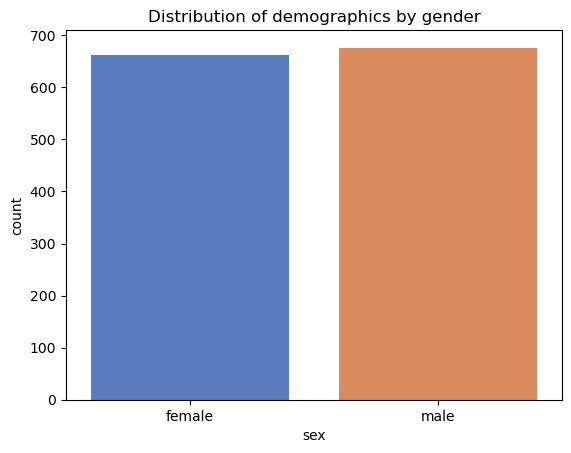

In [151]:
# There are 676 males and 662 females. This is plotted on a histogram
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Distribution of demographics by gender")
sns.countplot(x='sex', data=df, palette='muted')

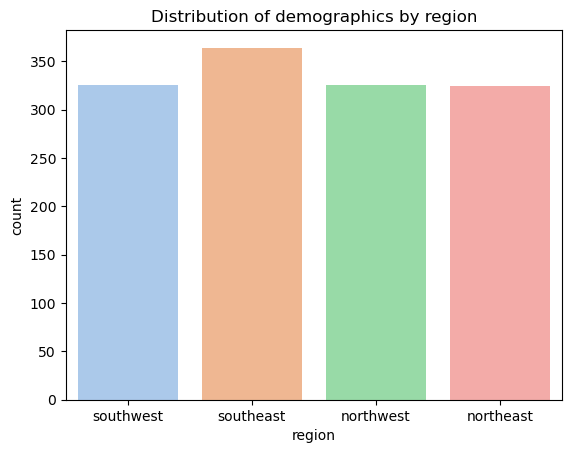

In [152]:
# Let us find the distribution of dempgraphics by region
plt.title("Distribution of demographics by region")
sns.countplot(x='region', data=df, palette='pastel')
plt.show()

<AxesSubplot:ylabel='Frequency'>

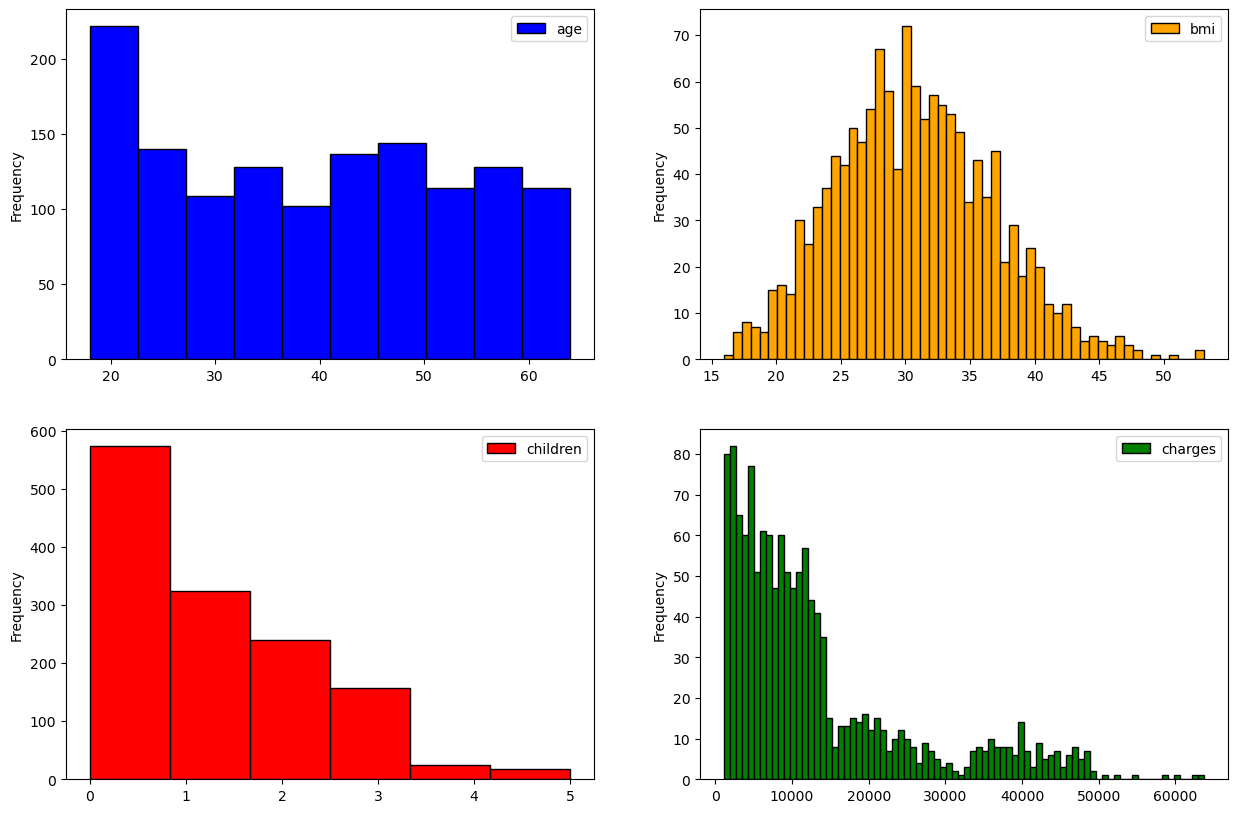

In [153]:
# Let us find a bit more about our dataset, like the frequency of age groups, bmi, etc.
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='age', ax=axes[0][0],  color='blue', edgecolor='black')
df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54, edgecolor='black')
df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6, edgecolor='black')
df.plot(kind='hist', y='charges', ax=axes[1][1], color = 'green', bins = 80, edgecolor='black')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

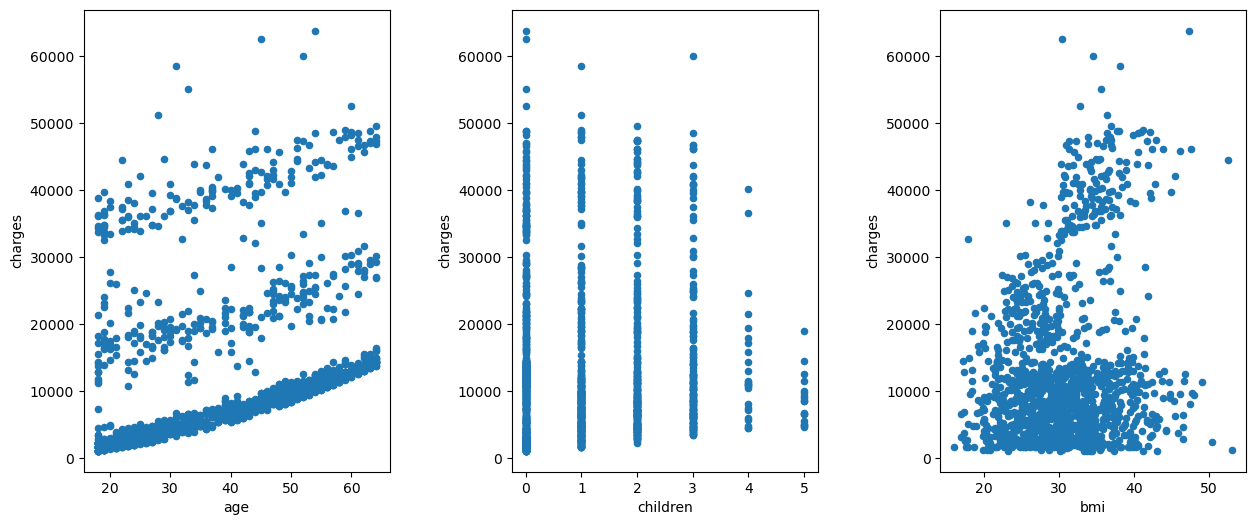

In [154]:
# Let us see whether three parameters, namely age, children and bmi affect the premium charges in any way
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='charges', ax=axes[0])
df.plot(kind='scatter', x='children', y='charges', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='charges', ax=axes[2])

In [155]:
# From the above graphs, we can see that 'age' and 'bmi' have a positive correlation for increase in premium charges of health insurance.
# However, no such trend was found in the 'children' parameter.
# From the above graphs,we can see that 'bmi' has a clear impact on premium charges.
# Let us see how other parameters like 'sex', 'smoker' and 'region' combined with 'bmi' impact the premium charges.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

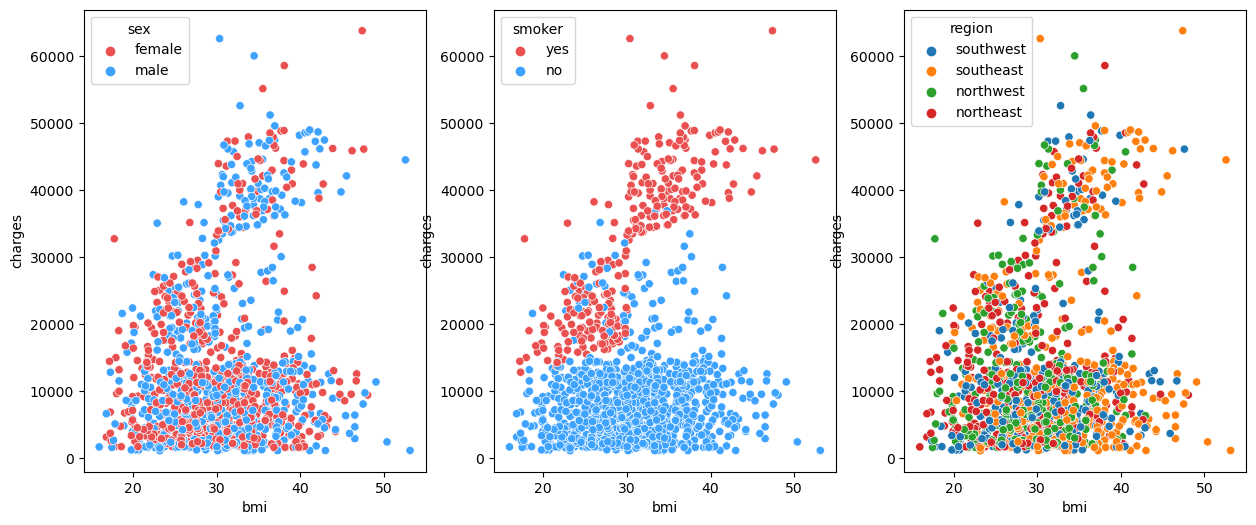

In [156]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='charges', ax=axes[0], data=df,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[1], data=df,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='charges', ax=axes[2], data=df,hue='region')

In [157]:
# From the above graphs, we can clealy see that only 'smoker' parameter with 'bmi' has a clear result.
# Smokers with high bmi pay higher insurance premium charges.

Text(0.5, 1.0, 'Data distribution- Sex vs Charges')

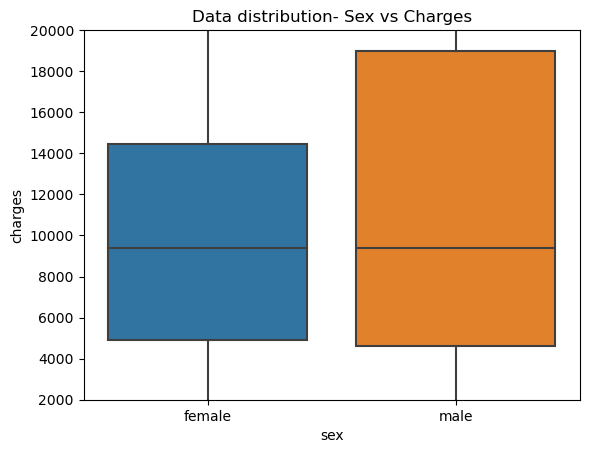

In [158]:
# Let us see out of male and female, which gender pays the higher premium.
sns.boxplot(x=df['sex'],y=df['charges'])
plt.ylim(2000, 20000)
plt.title("Data distribution- Sex vs Charges")

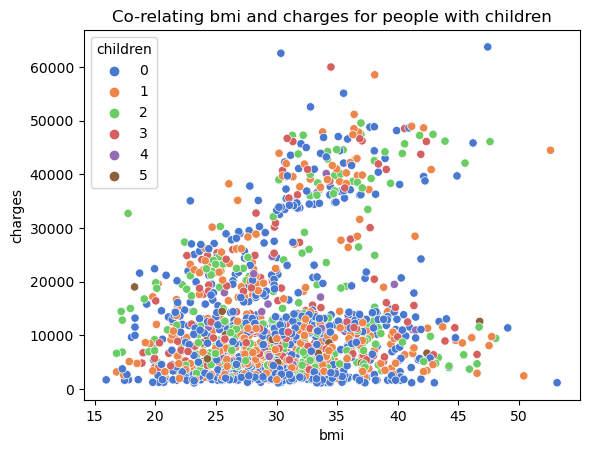

In [159]:
#now let us compare one final parameter in our dataset, i.e. children
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['children'], palette='muted')
plt.title("Co-relating bmi and charges for people with children")
plt.show()

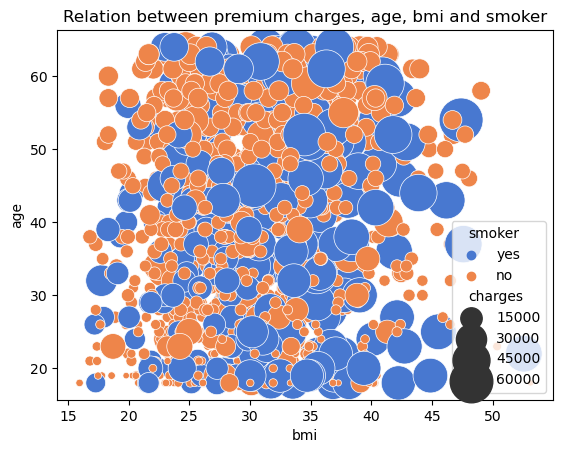

In [160]:
# as you can see that there is no clear relation between isurance prices and 'children' parameter combined with the 'bmi' parameter
#let us summarize our overall findings by visualization
# we know that the factors which impact the premium charges are age, bmi, sex and smoker
#Let us plot a graph for "Relation between premium charges, age, bmi and smoker"
sns.scatterplot(x=df['bmi'], y=df['age'], size=df['charges'], hue=df['smoker'], sizes=(20, 1000), cmap='coolwarm', palette='muted')
plt.title("Relation between premium charges, age, bmi and smoker")
plt.show()


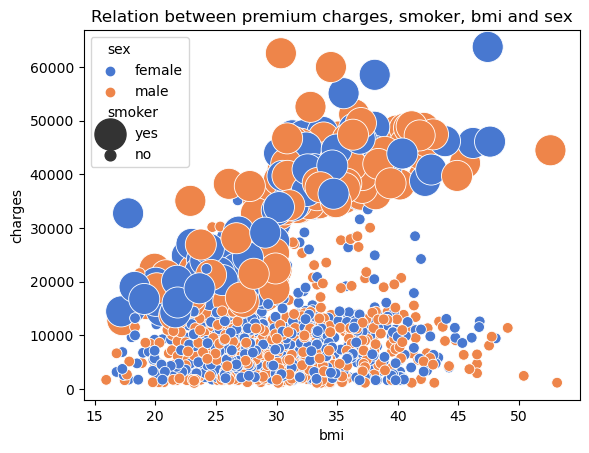

In [161]:
# Now let us replace 'age' parameter with 'sex' and plot the graph for "Relation between premium charges, smoker, bmi and sex"
sns.scatterplot(x=df['bmi'], y=df['charges'], size=df['smoker'], hue=df['sex'], sizes=(60, 500), cmap='coolwarm', palette='muted')
plt.title("Relation between premium charges, smoker, bmi and sex")
plt.show()

In [162]:
# From the above graphs, we can conclude the following:
# 1- Age, BMI, and smoker are the parameters that impact the insurance premium prices.
# 2- Sex is also one parameter which impacts the premium charges as males tend to pay higher premium than females.
# 3- Region and number of children do not impact the insurance premium prices.
# 4- People with less age, low BMI, and who are non smokers have less insurance prices.
# 5- People with high age, high BMI, and who are smokers have high insurance prices.

In [163]:
# Now we know that the factors which affect the premium charges are age, bmi, and whether the person is a smoker or not.
# We can use this findings to create our own ML model.
# We are using the same dataset to train and test our model.
# Firstly we modify our dataset by dropping 'region' column.
df.drop(['region'], axis=1, inplace=True) 
df.head()

,index,age,sex,bmi,children,smoker,charges
0,0,19,female,27.900,0,yes,16884.92400
1,1,18,male,33.770,1,no,1725.55230
2,2,28,male,33.000,3,no,4449.46200
3,3,33,male,22.705,0,no,21984.47061
4,4,32,male,28.880,0,no,3866.85520


In [164]:
# Then we convert the 'smoker' column and 'sex' column from object type to binary type.
# We have assigned 0 to males and 1 to female; and 0 to non-smokers and 1 to smokers.
# Changing binary categories to 1s and 0s
df['sex'] = df['sex'].map(lambda s :1  if s == 'female' else 0)
df['smoker'] = df['smoker'].map(lambda s :1  if s == 'yes' else 0)

df.head()

,index,age,sex,bmi,children,smoker,charges
0,0,19,1,27.900,0,1,16884.92400
1,1,18,0,33.770,1,0,1725.55230
2,2,28,0,33.000,3,0,4449.46200
3,3,33,0,22.705,0,0,21984.47061
4,4,32,0,28.880,0,0,3866.85520


In [165]:
# Firstly, we create feature matrix X by dropping the 'charges' column from the DataFrame df
X = df.drop(['charges'], axis = 1)
# Then, we have created a target vector y by assigning the 'charges' column from the original DataFrame df
y = df.charges
# Lastly, in this snippet, we have printed the shape of X and y
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)


Shape of X:  (1338, 6)
Shape of y:  (1338,)


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Here, we have performed a  train-test split on feature matrix X and target vector y
# We have set random_state to 0 for reproducibility of results

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state = 0)

#  Then, we have created a LinearRegression object and made the training data fit into it.
lr = LinearRegression().fit(X_train, y_train)

# Then, we have predicted the target variable for the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Lastly in this part of code, we have printed the R-squared score for the test data, which represents the goodness of fit of the model
print(lr.score(X_test, y_test))

0.7976587507055354


In [167]:
# The R-squared score of 0.7946864552566815 implies that the model has a reasonably good fit of 79.5%. 
# It means that the model is able to explain a significant proportion of the variability in the target variable.
# Now, we create a DataFrame 'results' to store the actual and predicted values of the target variable.
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
578,9724.53000,11423.848682
610,8547.69130,9919.773291
569,45702.02235,37738.001758
1034,12950.07120,16058.204369
198,9644.25250,6748.161543
...,...,...
1084,15019.76005,14681.996065
726,6664.68595,8086.820387
1132,20709.02034,15678.321657
725,40932.42950,33165.003732


In [168]:
# We can see that our model is able to predict insurance prmium charges.
# The results table above shows the actual premium charges and predicted premium charges of our ML model.
# It is important to know that our model has considered the parameters 'age', 'bmi', smoker', and 'sex' while predicting the premium charges.
# Any difference between the actual values and predicted values maybe because of some missing parameters in the dataset.
# The accuracy of the ML model can be further increased by getting more data like health history, income level, occupation, etc.

# Now we normalize the data.
from sklearn.preprocessing import StandardScaler

# First, we create an instance of the 'StandardScaler' class.
sc = StandardScaler()
# Then we apply the 'fit_transform' method of the 'StandardScaler' class to the training data.
# This scales and standardizes the predictor variables in the training data.
X_train = sc.fit_transform(X_train)
# Then we apply the transform method on test data.
# This is to ensure that the test data is scaled using the same parameters as the training data, to maintain consistency in the scaling.
X_test = sc.transform(X_test)

In [169]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5
0,-0.109630,-0.148533,-1.015067,0.545305,2.413948,1.971255
1,-1.222884,-1.497808,-1.015067,0.598672,-0.892195,-0.507291
2,-1.102955,-1.142736,0.985157,0.960921,0.760876,1.971255
3,1.316483,-0.503605,-1.015067,0.723195,0.760876,-0.507291
4,1.379055,1.342771,0.985157,0.269575,-0.065659,-0.507291


In [170]:
pd.DataFrame(y_train).head()

,charges
621,40182.24600
194,1137.46970
240,38511.62830
1168,4670.64000
1192,13019.16105


In [171]:
# Now we create a Decision Tree model to make predictions on the test data.
from sklearn.tree import DecisionTreeRegressor
# We have created an instance of the DecisionTreeRegressor class, which will be used as the regression model.
regressor = DecisionTreeRegressor()
# Now we fit the decision tree model to the training data, where X_train represents the predictor variables and y_train represents the target variable.
regressor.fit(X_train, y_train)
# Lastly, we use the trained decision tree model to predict the target variable for the test data X_test, and stores the predicted values in the y_pred variable.
y_pred = regressor.predict(X_test)



In [172]:
from sklearn.metrics import r2_score

# The test data X_test is used as input to generate predicted values for the target variable.
y_pred = decision_tree_reg.predict(X_test)

# Then we calculate the R2 score.
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

R2 score:  0.8757212398231619


[Text(0.5043859649122807, 0.9166666666666666, 'X[5] <= 0.732\nsquared_error = 143366150.414\nsamples = 1070\nvalue = 13201.182'),
 Text(0.2412280701754386, 0.75, 'X[1] <= 0.242\nsquared_error = 37130646.261\nsamples = 851\nvalue = 8479.309'),
 Text(0.13157894736842105, 0.5833333333333334, 'X[1] <= -1.178\nsquared_error = 22519261.947\nsamples = 475\nvalue = 5393.72'),
 Text(0.07017543859649122, 0.4166666666666667, 'X[4] <= 0.348\nsquared_error = 20340259.004\nsamples = 146\nvalue = 3299.442'),
 Text(0.03508771929824561, 0.25, 'X[3] <= -0.125\nsquared_error = 16500190.203\nsamples = 125\nvalue = 2874.707'),
 Text(0.017543859649122806, 0.08333333333333333, 'squared_error = 1550876.453\nsamples = 62\nvalue = 2093.292'),
 Text(0.05263157894736842, 0.08333333333333333, 'squared_error = 30019919.429\nsamples = 63\nvalue = 3643.717'),
 Text(0.10526315789473684, 0.25, 'X[0] <= 0.908\nsquared_error = 35732289.026\nsamples = 21\nvalue = 5827.626'),
 Text(0.08771929824561403, 0.08333333333333333,

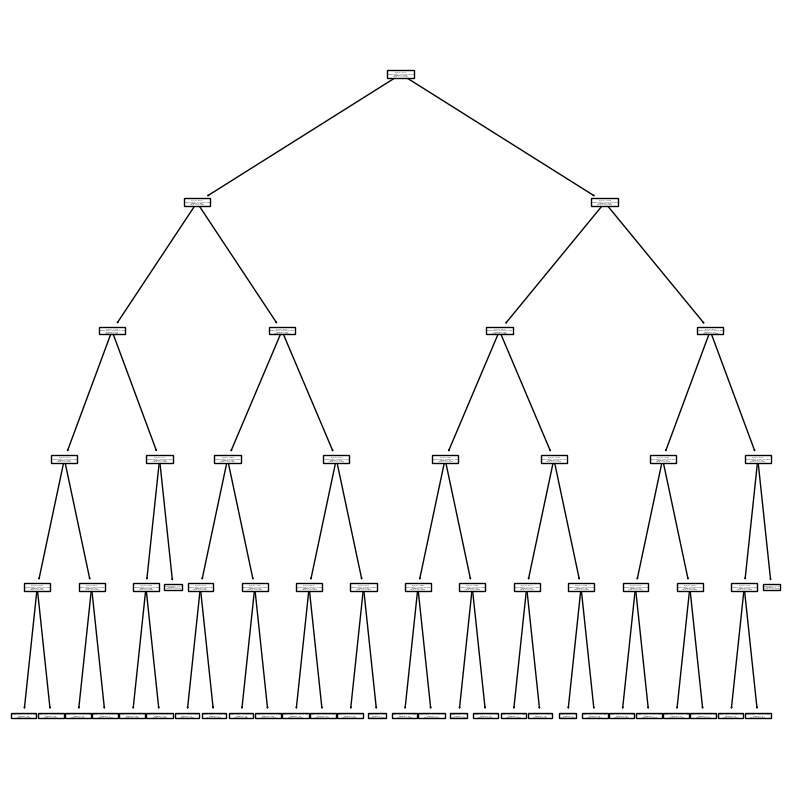

In [173]:
# From the above code snippet, we get a R2 score of 0.8709252929628356.
# This indicates that the trained DecisionTreeRegressor model is able to explain 87.09% of the variance in the target variable based on the predictions made on the test data.
# This indicates a relatively good performance of the model, as a higher R2 score suggests a better fit of the model to the data.
# For the final part of the code, we have generated a visual representation of the decision tree.
import sklearn
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
sklearn.tree.plot_tree(decision_tree_reg)